### Pima Indian Diabetes Classification Problem

#### imports

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.callbacks import ModelCheckpoint

In [15]:
seed = 2019
np.random.seed(seed)

In [16]:
pdata = pd.read_csv('pima-indians-diabetes.csv')
pdata.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
pdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
pdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#Loop thorugh each field and find how many entries have values in each field
def check_zero_entries(data, fields):
    for field in fields:
        print('field %s: num 0-entries: %d' % (field, len(data.loc[ data[field] == 0, field ])))

check_zero_entries(pdata, zero_fields)

field Glucose: num 0-entries: 5
field BloodPressure: num 0-entries: 35
field SkinThickness: num 0-entries: 227
field Insulin: num 0-entries: 374
field BMI: num 0-entries: 11


1. There are instances where the values are 0
2. Data preprocessing to impute avg of each column values for 0 emtries

In [19]:
from sklearn.model_selection import train_test_split

features = list(pdata.columns.values)
features.remove('Outcome')
print(features)
X = pdata[features]
y = pdata['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
(576, 8)
(192, 8)


In [20]:
def impute_zero_field(data, field):
    nonzero_vals = data.loc[data[field] != 0, field]
    avg = np.sum(nonzero_vals) / len(nonzero_vals)
    k = len(data.loc[ data[field] == 0, field])   # num of 0-entries
    data.loc[ data[field] == 0, field ] = avg
    print('Field: %s; fixed %d entries with value: %.3f' % (field, k, avg))

In [21]:
for field in zero_fields:
    impute_zero_field(X_train, field)

Field: Glucose; fixed 4 entries with value: 122.003
Field: BloodPressure; fixed 25 entries with value: 72.846
Field: SkinThickness; fixed 163 entries with value: 29.465
Field: Insulin; fixed 270 entries with value: 158.464
Field: BMI; fixed 8 entries with value: 32.663


In [22]:
check_zero_entries(X_test, zero_fields)

field Glucose: num 0-entries: 1
field BloodPressure: num 0-entries: 10
field SkinThickness: num 0-entries: 64
field Insulin: num 0-entries: 104
field BMI: num 0-entries: 3


In [23]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [46]:
NB_EPOCHS = 1000  # num of epochs to test for
BATCH_SIZE = 16

## Create our model
model = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
# Add dropout
#model.add(Dropout(0.1))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, init='uniform', activation='relu'))
# Add Droput
#model.add(Dropout(0.1))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, init='uniform', activation='sigmoid' ))

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

'''#checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]'''

print('Starting training...')
# train the model, store the results for plotting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    nb_epoch=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    #callbacks=callbacks_list,
                    verbose=1)

/usr/local/finra/anaconda/anaconda3/envs/finra_p36/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
/usr/local/finra/anaconda/anaconda3/envs/finra_p36/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/finra/anaconda/anaconda3/envs/finra_p36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  app.launch_new_instance()
/usr/local/finra/anaconda/anaconda3/envs/finra_p36/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Starting training...
Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 0s 367us/step - loss: 0.6871 - accuracy: 0.6285 - val_loss: 0.6766 - val_accuracy: 0.6771
Epoch 2/1000
576/576 [==============================] - 0s 104us/step - loss: 0.6770 - accuracy: 0.6424 - val_loss: 0.6670 - val_accuracy: 0.6771
Epoch 3/1000
576/576 [==============================] - 0s 100us/step - loss: 0.6736 - accuracy: 0.6424 - val_loss: 0.6624 - val_accuracy: 0.6771
Epoch 4/1000
576/576 [==============================] - 0s 84us/step - loss: 0.6721 - accuracy: 0.6424 - val_loss: 0.6597 - val_accuracy: 0.6771
Epoch 5/1000
576/576 [==============================] - 0s 79us/step - loss: 0.6689 - accuracy: 0.6424 - val_loss: 0.6552 - val_accuracy: 0.6771
Epoch 6/1000
576/576 [==============================] - 0s 79us/step - loss: 0.6692 - accuracy: 0.6424 - val_loss: 0.6529 - val_accuracy: 0.6771
Epoch 7/1000
576/576 [==============================] - 0s 7

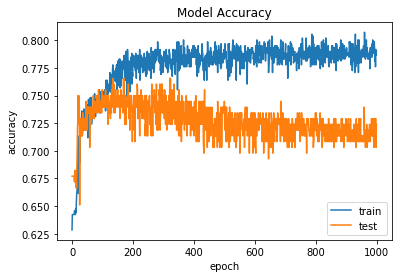

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

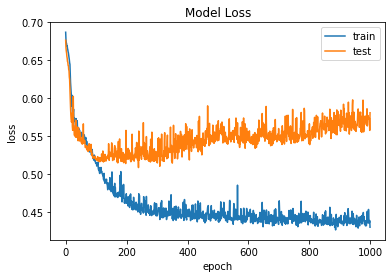

In [48]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [49]:
# print final accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 72.40%


- Few Take aways
- Model preformace is terible if you introduce a dropout
- Model as it stands in not great as it is not generalizing well on validation data
- Try complex model, increase number of dense layer nodes in each layer
- Try with/ without call back

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [56]:
# Create Keras DNN Model
#from tensorflow.contrib import keras
#from keras import models, layers, losses, optimizers, metrics
import keras

model = Sequential()

# Hyperparameters
hold_prob = 0.01
beta = 1e-8
alpha = 0.05
lr_decay = 0.01
iterations = 400
validation_split = 0.5
opt_momentum = 0.9 # (Use only for SGD)
batch_size = 32

# Optimizer
opt = optimizers.SGD(lr=alpha, decay=lr_decay, momentum=opt_momentum, nesterov=True)

# First Layer
model.add(layers.Dense(input_dim=8, units=8, activation='relu'))

# Hidden Layers
model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=8, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

# Output Layer
model.add(layers.Dense(units=2, activation='softmax'))

# Compiling the Model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split, batch_size=batch_size)

Train on 288 samples, validate on 288 samples
Epoch 1/400
288/288 [==============================] - 0s 910us/step - loss: 0.6716 - accuracy: 0.6215 - val_loss: 0.6448 - val_accuracy: 0.6562
Epoch 2/400
288/288 [==============================] - 0s 78us/step - loss: 0.6617 - accuracy: 0.6285 - val_loss: 0.6387 - val_accuracy: 0.6562
Epoch 3/400
288/288 [==============================] - 0s 77us/step - loss: 0.6497 - accuracy: 0.6285 - val_loss: 0.6310 - val_accuracy: 0.6562
Epoch 4/400
288/288 [==============================] - 0s 75us/step - loss: 0.6343 - accuracy: 0.6354 - val_loss: 0.6124 - val_accuracy: 0.6736
Epoch 5/400
288/288 [==============================] - 0s 80us/step - loss: 0.6126 - accuracy: 0.6597 - val_loss: 0.5880 - val_accuracy: 0.6910
Epoch 6/400
288/288 [==============================] - 0s 77us/step - loss: 0.5953 - accuracy: 0.6944 - val_loss: 0.5659 - val_accuracy: 0.7292
Epoch 7/400
288/288 [==============================] - 0s 76us/step - loss: 0.5613 - accu

In [57]:
predictions = model.predict_classes(scaled_x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       130
           1       0.62      0.58      0.60        62

    accuracy                           0.75       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.75      0.75      0.75       192

